# Polygon exploration and correction

This script:
- Prepares the polygons because the original ones have overlaps.
- Adds a buffer to identify which cells come from Sónar by Day and which come from Sónar by Night in the locations files.
- Associates the stages that are shown in the timetables to their corresponding polygons.

I use the `h3pandas` library to extract the h3 cells from the Sónar shapes to verify the final shapes. I need to run it with the ``skmob_updated_h3pandas`` environment for it to work.

This complication is because the versions of ``h3pandas`` and ``h3`` I tested are not compatible.

In [1]:
import geopandas as gpd
import pandas as pd
import h3pandas
import matplotlib.pyplot as plt
import os

In [2]:
import sys
from pathlib import Path

# Adding the project root for module imports
project_root = Path().resolve().parents[1]
sys.path.append(str(project_root))

from attendee_profiling import config

Defining the paths to read data.

In [20]:
INPUT_PATH = config.INPUT_PATH
PROCESSED_PATH = config.PROCESSED_PATH
input_path_zones = os.path.join(INPUT_PATH, "Zonas SONAR")

Defining the path to write data.

In [4]:
CLIPPED_POLYGONS_PATH = config.CLIPPED_POLYGONS_PATH

## Sónar by night polygons

In [5]:
shp_night_av1_2 = gpd.read_file(input_path_zones + r'\SONAR NOCHE\av1-2.json')
shp_night_av2_3 = gpd.read_file(input_path_zones + r'\SONAR NOCHE\av2-3.json')
shp_night_av3_4 = gpd.read_file(input_path_zones + r'\SONAR NOCHE\av3-4.json')
shp_night_p1 = gpd.read_file(input_path_zones + r'\SONAR NOCHE\p1.json')
shp_night_p2 = gpd.read_file(input_path_zones + r'\SONAR NOCHE\p2.json')
shp_night_p3 = gpd.read_file(input_path_zones + r'\SONAR NOCHE\p3.json')
shp_night_p4 = gpd.read_file(input_path_zones + r'\SONAR NOCHE\p4.json')

In [6]:
# Load each shapefile and add an identifier column
shp_night_av1_2['source_gis_file'] = 'av1-2'
shp_night_av2_3['source_gis_file'] = 'av2-3'
shp_night_av3_4['source_gis_file'] = 'av3-4'
shp_night_p1['source_gis_file'] = 'p1'
shp_night_p2['source_gis_file'] = 'p2'
shp_night_p3['source_gis_file'] = 'p3'
shp_night_p4['source_gis_file'] = 'p4'

# Concatenate all GeoDataFrames into a single one
night_polygons = gpd.GeoDataFrame(pd.concat([shp_night_av1_2, shp_night_av2_3, shp_night_av3_4, 
                                         shp_night_p1, shp_night_p2, shp_night_p3, shp_night_p4],
                                         ignore_index=True))

# Changing the name column to something more specific (to be used in a later stage)
night_polygons.rename(columns={'name':'polygon_name'}, inplace=True)

print(f'Sónar by night polygons shape: {night_polygons.shape}')
night_polygons

Sónar by night polygons shape: (22, 5)


,id,polygon_name,index,geometry,source_gis_file
0,7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,"POLYGON ((2.12903 41.35439, 2.12953 41.35364, ...",av1-2
1,42c150db-5db5-4a47-9ee8-7a72ec78e779,SONAR NIT - Zona VIP Club Barra,1,"POLYGON ((2.12916 41.35420, 2.12940 41.35383, ...",av1-2
2,4c1256b9-b59d-43fa-8771-5ea30046fe5d,SONAR NIT - SonarLab,0,"POLYGON ((2.12963 41.35541, 2.13082 41.35369, ...",av2-3
3,581ee06a-360f-4d68-9833-07e89c45da51,SONAR NIT - SonarLab Barra 1,1,"POLYGON ((2.13093 41.35434, 2.13080 41.35429, ...",av2-3
4,d37d093f-f120-4a94-a4b4-696c80cb6b53,SONAR NIT - SonarPub,0,"POLYGON ((2.13204 41.35484, 2.13269 41.35380, ...",av3-4
5,ca3e2882-d5fd-4cf5-ad30-7e8ecaabef4c,SONAR NIT - SonarPub VIP,1,"POLYGON ((2.13185 41.35513, 2.13203 41.35484, ...",av3-4
6,ee694d4b-e86f-4370-90d3-939a3b09ba61,SONAR NIT - SonarPub Barra No VIP,2,"POLYGON ((2.13284 41.35469, 2.13268 41.35491, ...",av3-4
7,b2bbb347-a08c-4dc4-a2f0-8a17d265458c,SONAR NIT - SonarPub Barra VIP 2,3,"POLYGON ((2.13217 41.35514, 2.13231 41.35494, ...",av3-4
8,87001bac-e928-4834-908b-a900c0829ed9,SONAR NIT - Entrada,0,"POLYGON ((2.12963 41.35247, 2.12990 41.35256, ...",p1
9,b07ccc20-f501-46ea-8abb-e9a7d8db6669,SONAR NIT - SonarClub,0,"POLYGON ((2.12954 41.35419, 2.13047 41.35278, ...",p2


<Axes: >

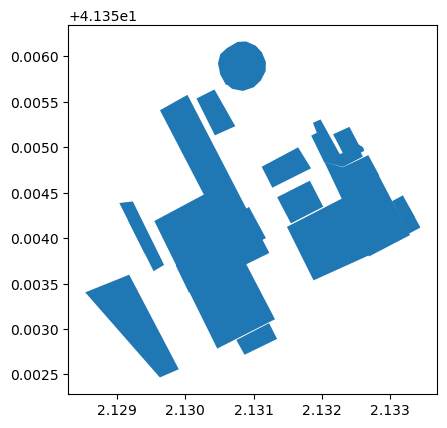

In [7]:
night_polygons.plot()

Getting the H3 cells that lay over the polygons and checking the result.

<Axes: >

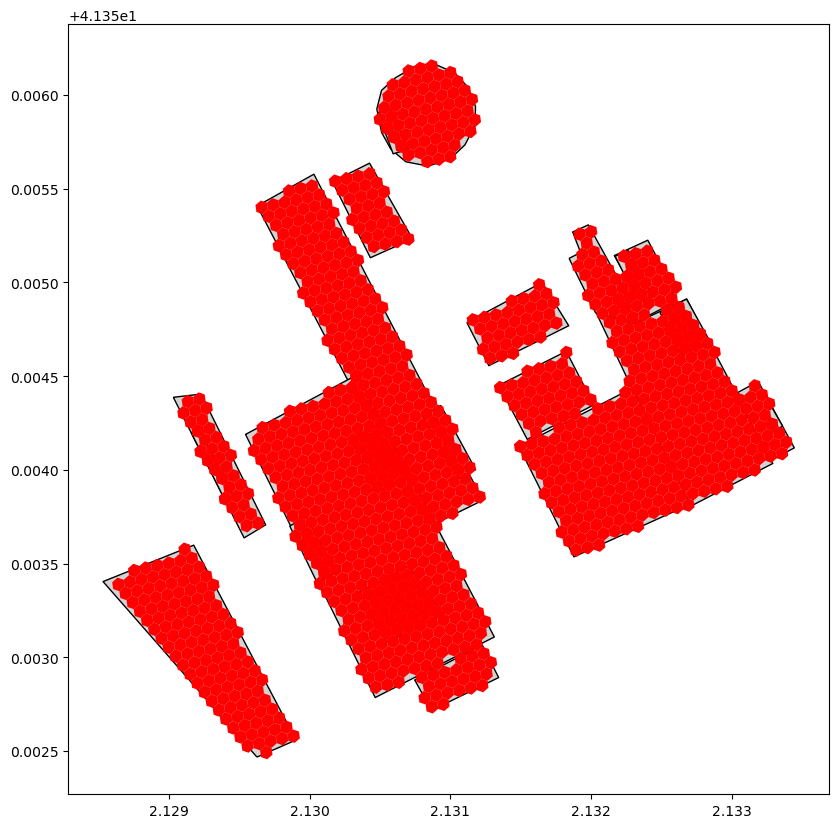

In [8]:
# Getting the H3 cells corresponding to the original polygons
night_polygons_h3=night_polygons.h3.polyfill_resample(13)
night_polygons_h3=night_polygons_h3.reset_index()
night_polygons_h3.rename(columns={'h3_polyfill':'h3_cell'}, inplace=True)

# Plotting the resulting cells on top of the original polygons
fig, ax = plt.subplots(figsize=(10, 10))
night_polygons.plot(ax=ax, color='lightgrey', edgecolor='black')
night_polygons_h3.plot(ax=ax, color='red')


In [9]:
# Checking the resulting H3 cells shape structure
print(f'There are {night_polygons_h3.shape[0]} H3 cells laying within the Sónar polygons')
print(f"There are {len(night_polygons_h3['h3_cell'].unique())} unique H3 cells")

night_polygons_h3

There are 1315 H3 cells laying within the Sónar polygons
There are 1200 unique H3 cells


,h3_cell,level_0,id,polygon_name,index,geometry,source_gis_file
0,8d394461e8295bf,0,7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,"POLYGON ((2.12934 41.35397, 2.12934 41.35393, ...",av1-2
1,8d394461e82d43f,0,7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,"POLYGON ((2.12906 41.35431, 2.12907 41.35428, ...",av1-2
2,8d394461e82837f,0,7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,"POLYGON ((2.12923 41.35406, 2.12924 41.35403, ...",av1-2
3,8d394461e82943f,0,7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,"POLYGON ((2.12942 41.35398, 2.12942 41.35394, ...",av1-2
4,8d394461e82baff,0,7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,"POLYGON ((2.12954 41.35378, 2.12955 41.35374, ...",av1-2
...,...,...,...,...,...,...,...
1310,8d394461e86b57f,20,5c0d3ecb-d17e-44ee-b22a-1008e37367ca,SONAR NIT - Bar Pub,0,"POLYGON ((2.13324 41.35426, 2.13325 41.35422, ...",p4
1311,8d394461e86b4bf,20,5c0d3ecb-d17e-44ee-b22a-1008e37367ca,SONAR NIT - Bar Pub,0,"POLYGON ((2.13318 41.35413, 2.13319 41.35410, ...",p4
1312,8d394461e86b4ff,20,5c0d3ecb-d17e-44ee-b22a-1008e37367ca,SONAR NIT - Bar Pub,0,"POLYGON ((2.13326 41.35415, 2.13327 41.35411, ...",p4
1313,8d394461e86bc7f,20,5c0d3ecb-d17e-44ee-b22a-1008e37367ca,SONAR NIT - Bar Pub,0,"POLYGON ((2.13322 41.35436, 2.13323 41.35433, ...",p4


Fixing the polygons so that there are no overlaps and each H3 cell can be associated with a single polygon.

There are 225 non-unique cells


<Axes: >

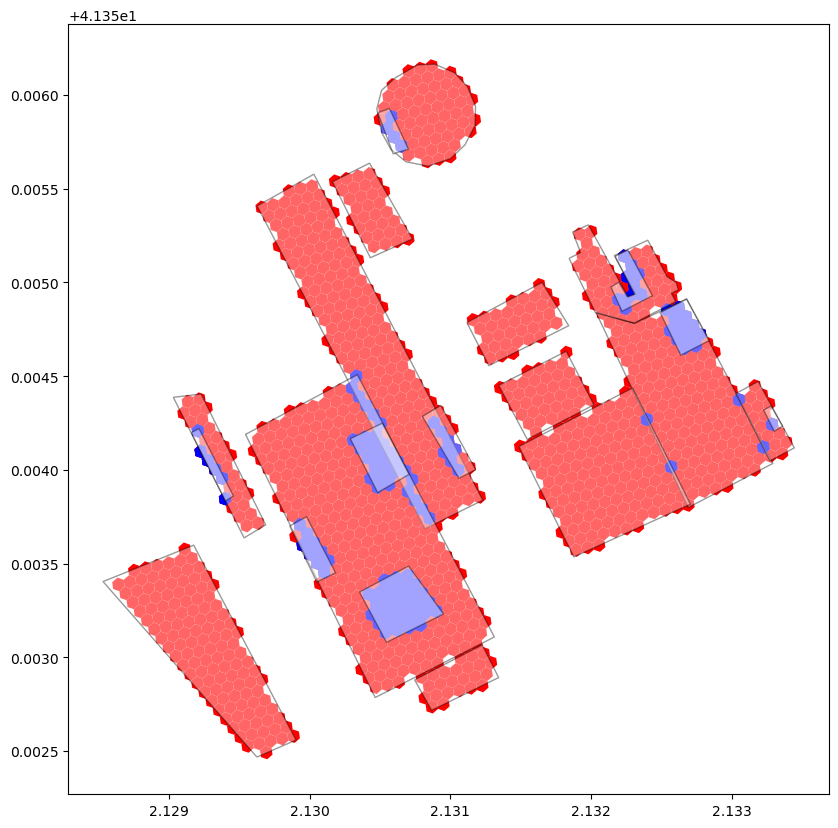

In [10]:
# Getting all duplicated values to see which cells are associated with more than one stage

non_unique_cells = night_polygons_h3.loc[night_polygons_h3['h3_cell'].duplicated(keep=False)]
print(f'There are {len(non_unique_cells)} non-unique cells')


fig, ax = plt.subplots(figsize=(10, 10))
night_polygons_h3.plot(ax=ax, color='red')
non_unique_cells.plot(ax=ax, color='blue')
night_polygons.plot(ax=ax, facecolor='white', edgecolor='black', alpha=0.4)


To avoid duplicates of the h3 cells, I clip the polygons, so that they do not overlap.

<Axes: >

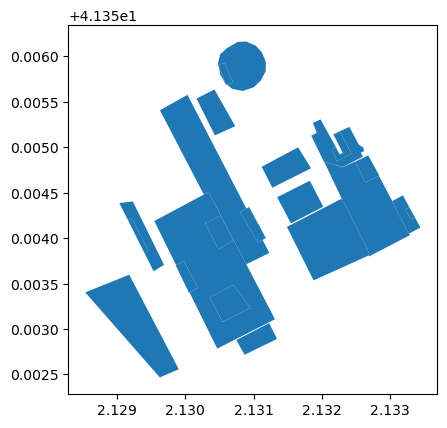

In [11]:
#Creating a dictionary to define, for each polygon (keys), which other polygon parts (values) will be removed
dict_clipping_night = {'SONAR NIT  - Zona VIP Club':['SONAR NIT  - Zona VIP Club Barra'],
                       'SONAR NIT - SonarLab':['SONAR NIT - SonarClub','SONAR NIT - SonarLab Barra 1'],
                       'SONAR NIT - SonarClub':['SONAR NIT - SonarClub Barra la Nueva','SONAR NIT - SonarClub Barra','SONAR NIT - SonarClub Barra Catalá'],
                       'SONAR NIT - SonarPub':['SONAR NIT - Restauración', 'SONAR NIT - Bar Pub', 'SONAR NIT - SonarPub Barra No VIP'],
                       'SONAR NIT - SonarPub VIP':['SONAR NIT - SonarPub Barra VIP 2','SONAR NIT - SonarPub'],
                       'SONAR NIT - SonarCar':['SONAR NIT - SonarCar Barra Car 2'],
                       'SONAR NIT - Bar Pub':['SONAR NIT - Bar Pub Barra']}

night_polygons_clipped = night_polygons.copy()

for name_polygon, names_polygons_removal in dict_clipping_night.items():
    for name_polygon2 in names_polygons_removal:
        polygon = night_polygons_clipped.loc[night_polygons_clipped['polygon_name']==name_polygon]
        polygon2 = night_polygons_clipped.loc[night_polygons_clipped['polygon_name']==name_polygon2]

        # Removing the overlapping part
        polygon_geometry_clipped = polygon.geometry.difference(polygon2.geometry, align=False)

        # Updating the geometry in the original GeoDataFrame
        night_polygons_clipped.loc[night_polygons_clipped['polygon_name'] == name_polygon, 'geometry'] = polygon_geometry_clipped

night_polygons_clipped.plot()

Checking that there are no overlaps.

There are 1200 H3 cells laying within the Sónar polygons
There are 0 non-unique cells


<Axes: >

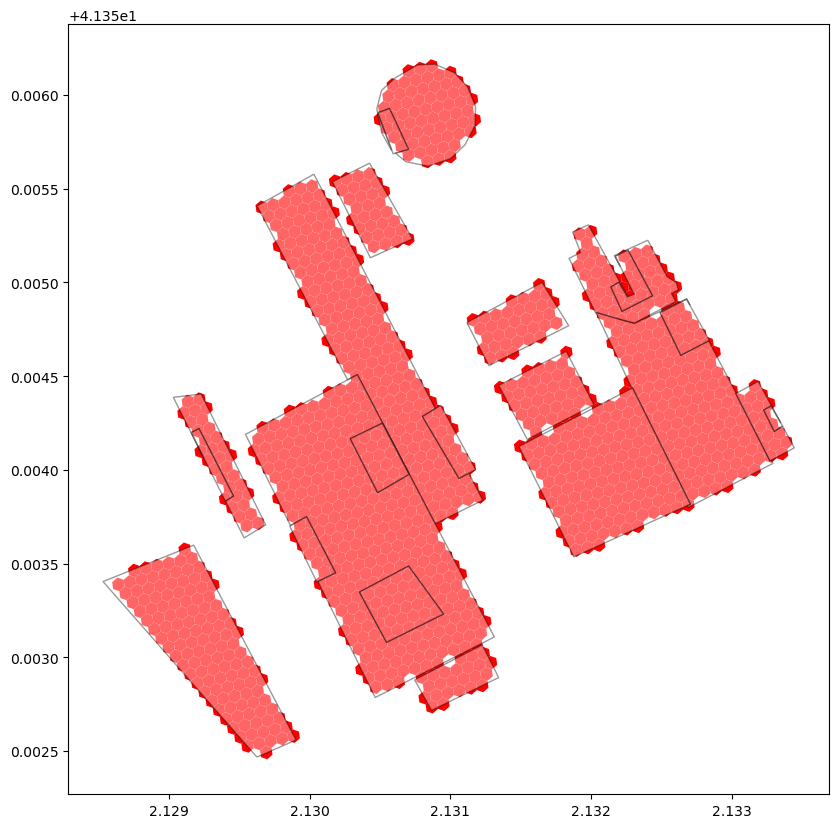

In [12]:
night_polygons_h3=night_polygons_clipped.h3.polyfill_resample(13)

night_polygons_h3=night_polygons_h3.reset_index()
night_polygons_h3.rename(columns={'h3_polyfill':'h3_cell'}, inplace=True)
print(f'There are {night_polygons_h3.shape[0]} H3 cells laying within the Sónar polygons')

non_unique_cells = night_polygons_h3.loc[night_polygons_h3['h3_cell'].duplicated(keep=False)]
print(f'There are {len(non_unique_cells)} non-unique cells')


fig, ax = plt.subplots(figsize=(10, 10))
night_polygons_h3.plot(ax=ax, color='red')
night_polygons_clipped.plot(ax=ax, facecolor='white', edgecolor='black', alpha=0.4)

### Identifying cells from Sónar by Night

Getting a buffer to expand the area corresponding to the Sónar by Night.

<Axes: >

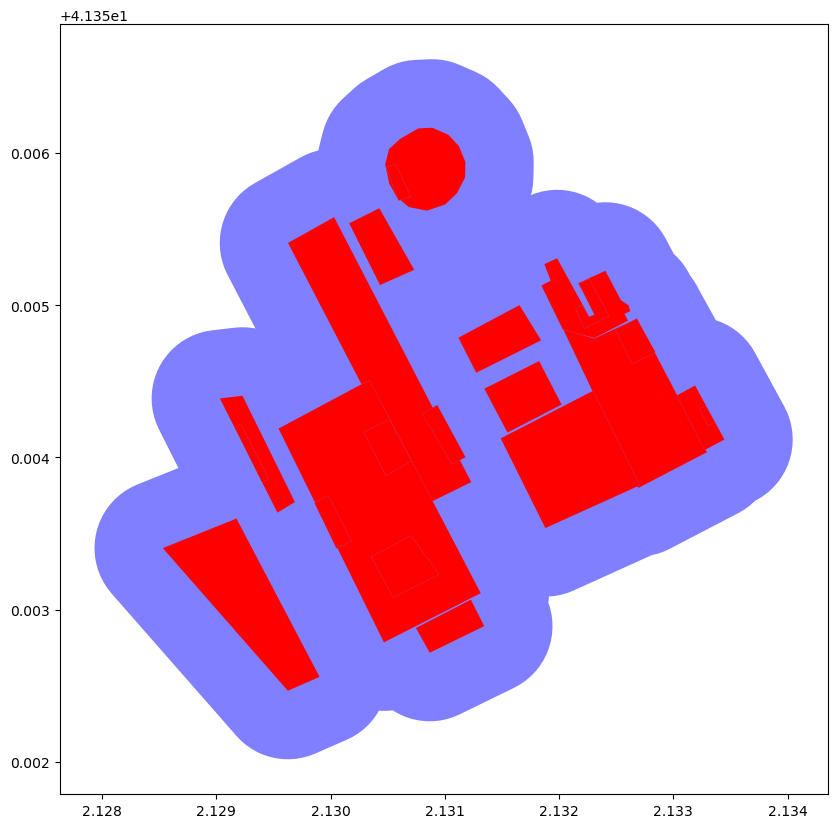

In [13]:
# Projecting the polygons and getting a buffer in meters
buffered_gdf_night = night_polygons_clipped.to_crs(night_polygons_clipped.estimate_utm_crs())
buffered_gdf_night['geometry'] = buffered_gdf_night.geometry.buffer(50)

# Dissolve all polygons into a single shape
dissolved_shape_night = buffered_gdf_night.dissolve()

# Reproject back to the original geographic CRS for plotting
dissolved_shape_night = dissolved_shape_night.to_crs(night_polygons_clipped.crs)


# Plotting the buffer below the polygons
fig, ax = plt.subplots(figsize=(10, 10))

dissolved_shape_night.plot(ax=ax, color='blue', alpha=0.5)
night_polygons_clipped.plot(ax=ax, color='red')

There are 3676 H3 cells laying within the Sónar buffer (Night)
There are 0 non-unique cells


<Axes: >

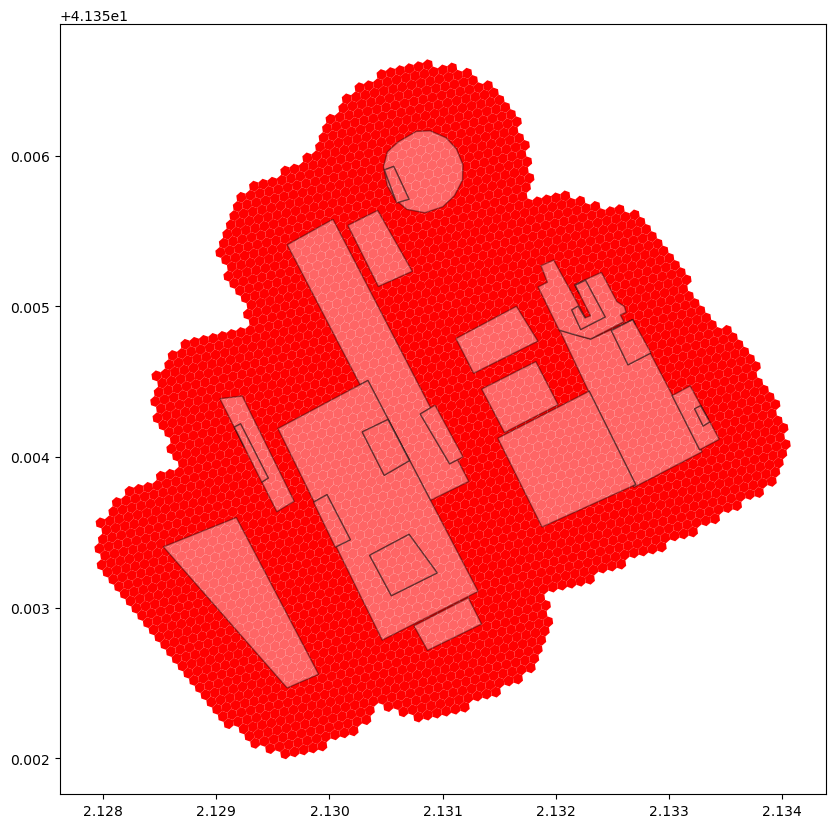

In [14]:
# Extracting the H3 cells
night_buffer_h3 = dissolved_shape_night.h3.polyfill_resample(13)

night_buffer_h3 = night_buffer_h3.reset_index()
night_buffer_h3.rename(columns={'h3_polyfill':'h3_cell'}, inplace=True)
print(f'There are {night_buffer_h3.shape[0]} H3 cells laying within the Sónar buffer (Night)')

non_unique_cells = night_buffer_h3.loc[night_buffer_h3['h3_cell'].duplicated(keep=False)]
print(f'There are {len(non_unique_cells)} non-unique cells')


fig, ax = plt.subplots(figsize=(10, 10))
night_buffer_h3.plot(ax=ax, color='red')
night_polygons_clipped.plot(ax=ax, facecolor='white', edgecolor='black', alpha=0.4)


In [15]:
night_buffer_h3

,h3_cell,level_0,geometry,id,polygon_name,index,source_gis_file
0,8d394461e875aff,0,"POLYGON ((2.13090 41.35439, 2.13091 41.35435, ...",7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,av1-2
1,8d394461e86a5bf,0,"POLYGON ((2.13256 41.35409, 2.13256 41.35405, ...",7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,av1-2
2,8d394461e86e83f,0,"POLYGON ((2.13236 41.35473, 2.13236 41.35469, ...",7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,av1-2
3,8d394461e86b9bf,0,"POLYGON ((2.13320 41.35447, 2.13321 41.35444, ...",7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,av1-2
4,8d394461e809a7f,0,"POLYGON ((2.13028 41.35317, 2.13029 41.35313, ...",7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,av1-2
...,...,...,...,...,...,...,...
3671,8d394461e948a7f,0,"POLYGON ((2.13122 41.35606, 2.13123 41.35603, ...",7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,av1-2
3672,8d394461e829abf,0,"POLYGON ((2.12967 41.35419, 2.12968 41.35415, ...",7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,av1-2
3673,8d394461e80db3f,0,"POLYGON ((2.12979 41.35354, 2.12980 41.35350, ...",7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,av1-2
3674,8d394461e85427f,0,"POLYGON ((2.13093 41.35310, 2.13094 41.35306, ...",7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,av1-2


In [16]:
# Selecting only the cells and adding a label to identify them as belonging to Sónar by Night
night_buffer_h3 = night_buffer_h3[['h3_cell','geometry']].copy()
night_buffer_h3['sonar_type'] = 'sonar_night'
night_buffer_h3

,h3_cell,geometry,sonar_type
0,8d394461e875aff,"POLYGON ((2.13090 41.35439, 2.13091 41.35435, ...",sonar_night
1,8d394461e86a5bf,"POLYGON ((2.13256 41.35409, 2.13256 41.35405, ...",sonar_night
2,8d394461e86e83f,"POLYGON ((2.13236 41.35473, 2.13236 41.35469, ...",sonar_night
3,8d394461e86b9bf,"POLYGON ((2.13320 41.35447, 2.13321 41.35444, ...",sonar_night
4,8d394461e809a7f,"POLYGON ((2.13028 41.35317, 2.13029 41.35313, ...",sonar_night
...,...,...,...
3671,8d394461e948a7f,"POLYGON ((2.13122 41.35606, 2.13123 41.35603, ...",sonar_night
3672,8d394461e829abf,"POLYGON ((2.12967 41.35419, 2.12968 41.35415, ...",sonar_night
3673,8d394461e80db3f,"POLYGON ((2.12979 41.35354, 2.12980 41.35350, ...",sonar_night
3674,8d394461e85427f,"POLYGON ((2.13093 41.35310, 2.13094 41.35306, ...",sonar_night


Writing the resulting files for the buffer cells.

In [ ]:
# Writing the buffer shape to visualize it in context in Qgis
dissolved_shape_night.to_file(os.path.join(CLIPPED_POLYGONS_PATH, 'buffer_night.json'), driver='GeoJSON')  

# Writing the H3 cells
night_buffer_h3.to_file(os.path.join(CLIPPED_POLYGONS_PATH, 'h3_cells_night_lookup.json'), driver='GeoJSON')  

### Associating the GIS polygons with their corresponding stages

The Sónar timetables contain the stages where each event ocurred, but there is not an explicit association to the corresponding polygons. I add them by manually looking at the polygons and the maps published by Sónar.

In [ ]:
sonar_timetables = pd.read_csv(os.path.join(PROCESSED_PATH, 'sonar_timetables_preprocessed.csv'))
sonar_timetables['stage'].unique()

array(['SonarVillage', 'SonarHall', 'Complex+D', 'SonarPark', 'Stage+D',
       'SonarÀgora', 'Project Area', 'Room+D', 'Espai Oníric', 'Room+D 2',
       'SonarClub', 'SonarPub', 'SonarLab x Printworks', 'SonarCar'],
      dtype=object)

After visual inspection, I rename a column for clarity. It is because the name is confusing, it is called "SONAR NIT - SonarCar Barra Car", but it does not belong to SonarCar. It is more likely a bar associated with Autos de choques, so I rename it accordingly.

Also, there is another similar name that does correspond to SonarCar, named "SONAR NIT - SonarCar Barra Car 2". I also rename to remove the unnecessary parts and avoid confusions.

In [22]:
night_polygons_clipped['polygon_name'].unique()

array(['SONAR NIT  - Zona VIP Club', 'SONAR NIT  - Zona VIP Club Barra',
       'SONAR NIT - SonarLab', 'SONAR NIT - SonarLab Barra 1',
       'SONAR NIT - SonarPub', 'SONAR NIT - SonarPub VIP',
       'SONAR NIT - SonarPub Barra No VIP',
       'SONAR NIT - SonarPub Barra VIP 2', 'SONAR NIT - Entrada',
       'SONAR NIT - SonarClub', 'SONAR NIT - Cashless 1',
       'SONAR NIT - SonarClub Barra la Nueva',
       'SONAR NIT - SonarClub Barra',
       'SONAR NIT - SonarClub Barra Catalá', 'SONAR NIT - SonarCar',
       'SONAR NIT - Restauración', 'SONAR NIT - SonarCar Barra Car',
       'SONAR NIT - Autos de choques', 'SONAR NIT - SonarLab Barra 2',
       'SONAR NIT - SonarCar Barra Car 2', 'SONAR NIT - Bar Pub',
       'SONAR NIT - Bar Pub Barra'], dtype=object)

In [23]:
night_polygons_clipped['polygon_name'] = night_polygons_clipped['polygon_name'].replace({'SONAR NIT - SonarCar Barra Car':'SONAR NIT - Autos de choques Barra',
                                                                                         'SONAR NIT - SonarCar Barra Car 2':'SONAR NIT - SonarCar Barra'})
night_polygons_clipped['polygon_name'].unique()

array(['SONAR NIT  - Zona VIP Club', 'SONAR NIT  - Zona VIP Club Barra',
       'SONAR NIT - SonarLab', 'SONAR NIT - SonarLab Barra 1',
       'SONAR NIT - SonarPub', 'SONAR NIT - SonarPub VIP',
       'SONAR NIT - SonarPub Barra No VIP',
       'SONAR NIT - SonarPub Barra VIP 2', 'SONAR NIT - Entrada',
       'SONAR NIT - SonarClub', 'SONAR NIT - Cashless 1',
       'SONAR NIT - SonarClub Barra la Nueva',
       'SONAR NIT - SonarClub Barra',
       'SONAR NIT - SonarClub Barra Catalá', 'SONAR NIT - SonarCar',
       'SONAR NIT - Restauración', 'SONAR NIT - Autos de choques Barra',
       'SONAR NIT - Autos de choques', 'SONAR NIT - SonarLab Barra 2',
       'SONAR NIT - SonarCar Barra', 'SONAR NIT - Bar Pub',
       'SONAR NIT - Bar Pub Barra'], dtype=object)

Adding a new column for the stage that corresponds to each polygon.

In [24]:
night_polygon_to_stage = {'SONAR NIT  - Zona VIP Club':'SonarClub',
                          'SONAR NIT  - Zona VIP Club Barra':'SonarClub',
                          'SONAR NIT - SonarClub':'SonarClub',
                          'SONAR NIT - SonarClub Barra':'SonarClub',
                          'SONAR NIT - SonarClub Barra Catalá':'SonarClub',
                          'SONAR NIT - SonarClub Barra la Nueva':'SonarClub',
                          'SONAR NIT - Cashless 1':'NA-Cashless1', # No stage, but explicit label added
                          'SONAR NIT - Autos de choques':'NA-autos_choques', # No stage, but explicit label added
                          'SONAR NIT - Bar Pub':'SonarPub',
                          'SONAR NIT - Bar Pub Barra':'SonarPub',
                          'SONAR NIT - SonarPub':'SonarPub',
                          'SONAR NIT - SonarPub Barra No VIP':'SonarPub',
                          'SONAR NIT - SonarPub Barra VIP 2':'SonarPub',
                          'SONAR NIT - SonarPub VIP':'SonarPub',
                          'SONAR NIT - Entrada':'NA-Entrada', # No stage, but explicit label added
                          'SONAR NIT - Restauración':'NA-Restauración', # No stage, but explicit label added
                          'SONAR NIT - SonarCar':'SonarCar',
                          'SONAR NIT - SonarCar Barra':'SonarCar',
                          'SONAR NIT - Autos de choques Barra':'NA-autos_choques_barra', # No stage, but explicit label added
                          'SONAR NIT - SonarLab':'SonarLab x Printworks',
                          'SONAR NIT - SonarLab Barra 1':'SonarLab x Printworks',
                          'SONAR NIT - SonarLab Barra 2':'SonarLab x Printworks'}

night_polygons_clipped['stage'] = night_polygons_clipped['polygon_name']
night_polygons_clipped['stage'] = night_polygons_clipped['stage'].replace(night_polygon_to_stage)
night_polygons_clipped

,id,polygon_name,index,geometry,source_gis_file,stage
0,7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,"POLYGON ((2.12903 41.35439, 2.12923 41.35440, ...",av1-2,SonarClub
1,42c150db-5db5-4a47-9ee8-7a72ec78e779,SONAR NIT - Zona VIP Club Barra,1,"POLYGON ((2.12916 41.35420, 2.12940 41.35383, ...",av1-2,SonarClub
2,4c1256b9-b59d-43fa-8771-5ea30046fe5d,SONAR NIT - SonarLab,0,"POLYGON ((2.13003 41.35558, 2.13089 41.35433, ...",av2-3,SonarLab x Printworks
3,581ee06a-360f-4d68-9833-07e89c45da51,SONAR NIT - SonarLab Barra 1,1,"POLYGON ((2.13093 41.35434, 2.13080 41.35429, ...",av2-3,SonarLab x Printworks
4,d37d093f-f120-4a94-a4b4-696c80cb6b53,SONAR NIT - SonarPub,0,"POLYGON ((2.13268 41.35491, 2.13270 41.35488, ...",av3-4,SonarPub
5,ca3e2882-d5fd-4cf5-ad30-7e8ecaabef4c,SONAR NIT - SonarPub VIP,1,"POLYGON ((2.13240 41.35523, 2.13254 41.35503, ...",av3-4,SonarPub
6,ee694d4b-e86f-4370-90d3-939a3b09ba61,SONAR NIT - SonarPub Barra No VIP,2,"POLYGON ((2.13284 41.35469, 2.13268 41.35491, ...",av3-4,SonarPub
7,b2bbb347-a08c-4dc4-a2f0-8a17d265458c,SONAR NIT - SonarPub Barra VIP 2,3,"POLYGON ((2.13217 41.35514, 2.13231 41.35494, ...",av3-4,SonarPub
8,87001bac-e928-4834-908b-a900c0829ed9,SONAR NIT - Entrada,0,"POLYGON ((2.12963 41.35247, 2.12990 41.35256, ...",p1,NA-Entrada
9,b07ccc20-f501-46ea-8abb-e9a7d8db6669,SONAR NIT - SonarClub,0,"POLYGON ((2.13131 41.35311, 2.13047 41.35278, ...",p2,SonarClub


### Computing the area assigned to each stage

In [25]:
def compute_stage_area(polygons_clipped):
    # Project dataframe to obtain the calculation in meters
    polygons_clipped_projected = polygons_clipped.to_crs(polygons_clipped.estimate_utm_crs())

    # Dissolve the polygons for each stage
    dissolved_stage = polygons_clipped_projected.dissolve(by='stage').reset_index()

    # Calculate the total area for each stage
    dissolved_stage['stage_area_m2'] = dissolved_stage.geometry.area.round(0).astype(int)

    # Merge the total area back to the original GeoDataFrame
    polygons_clipped = polygons_clipped.merge(dissolved_stage[['stage','stage_area_m2']], on='stage', how='left')

    return polygons_clipped

In [26]:
night_polygons_clipped = compute_stage_area(polygons_clipped=night_polygons_clipped)
night_polygons_clipped

,id,polygon_name,index,geometry,source_gis_file,stage,stage_area_m2
0,7d476bbb-1073-40ec-bcfc-b72b71b12d66,SONAR NIT - Zona VIP Club,0,"POLYGON ((2.12903 41.35439, 2.12923 41.35440, ...",av1-2,SonarClub,14914
1,42c150db-5db5-4a47-9ee8-7a72ec78e779,SONAR NIT - Zona VIP Club Barra,1,"POLYGON ((2.12916 41.35420, 2.12940 41.35383, ...",av1-2,SonarClub,14914
2,4c1256b9-b59d-43fa-8771-5ea30046fe5d,SONAR NIT - SonarLab,0,"POLYGON ((2.13003 41.35558, 2.13089 41.35433, ...",av2-3,SonarLab x Printworks,9171
3,581ee06a-360f-4d68-9833-07e89c45da51,SONAR NIT - SonarLab Barra 1,1,"POLYGON ((2.13093 41.35434, 2.13080 41.35429, ...",av2-3,SonarLab x Printworks,9171
4,d37d093f-f120-4a94-a4b4-696c80cb6b53,SONAR NIT - SonarPub,0,"POLYGON ((2.13268 41.35491, 2.13270 41.35488, ...",av3-4,SonarPub,8818
5,ca3e2882-d5fd-4cf5-ad30-7e8ecaabef4c,SONAR NIT - SonarPub VIP,1,"POLYGON ((2.13240 41.35523, 2.13254 41.35503, ...",av3-4,SonarPub,8818
6,ee694d4b-e86f-4370-90d3-939a3b09ba61,SONAR NIT - SonarPub Barra No VIP,2,"POLYGON ((2.13284 41.35469, 2.13268 41.35491, ...",av3-4,SonarPub,8818
7,b2bbb347-a08c-4dc4-a2f0-8a17d265458c,SONAR NIT - SonarPub Barra VIP 2,3,"POLYGON ((2.13217 41.35514, 2.13231 41.35494, ...",av3-4,SonarPub,8818
8,87001bac-e928-4834-908b-a900c0829ed9,SONAR NIT - Entrada,0,"POLYGON ((2.12963 41.35247, 2.12990 41.35256, ...",p1,NA-Entrada,5438
9,b07ccc20-f501-46ea-8abb-e9a7d8db6669,SONAR NIT - SonarClub,0,"POLYGON ((2.13131 41.35311, 2.13047 41.35278, ...",p2,SonarClub,14914


### Writing the clipped polygons

In [27]:
night_polygons_clipped.to_file(os.path.join(CLIPPED_POLYGONS_PATH, 'sonar_night_polygons_clipped.json'), driver='GeoJSON')

## Sónar by day polygons

In [28]:
shp_day_p1 = gpd.read_file(input_path_zones + r'\SONAR DIA\p1.json')
shp_day_p2 = gpd.read_file(input_path_zones + r'\SONAR DIA\p2.json')
shp_day_p3 = gpd.read_file(input_path_zones + r'\SONAR DIA\p3.json')
shp_day_p4 = gpd.read_file(input_path_zones + r'\SONAR DIA\p4.json')
shp_day_p5_0 = gpd.read_file(input_path_zones + r'\SONAR DIA\p5.0.json')
shp_day_p5_1 = gpd.read_file(input_path_zones + r'\SONAR DIA\p5.1.json')
shp_day_p5_2 = gpd.read_file(input_path_zones + r'\SONAR DIA\p5.2.json')

In [29]:
# Load each shapefile and add an identifier column
shp_day_p1['source_gis_file'] = 'p1'
shp_day_p2['source_gis_file'] = 'p2'
shp_day_p3['source_gis_file'] = 'p3'
shp_day_p4['source_gis_file'] = 'p4'
shp_day_p5_0['source_gis_file'] = 'p5.0'
shp_day_p5_1['source_gis_file'] = 'p5.1'
shp_day_p5_2['source_gis_file'] = 'p5.2'


# Concatenate all GeoDataFrames into a single one
day_polygons = gpd.GeoDataFrame(pd.concat([shp_day_p1, shp_day_p2, shp_day_p3, shp_day_p4,
                                           shp_day_p5_0, shp_day_p5_1, shp_day_p5_2],
                                           ignore_index=True))

# Changing the name column to something more specific (to be used in a later stage)
day_polygons.rename(columns={'name':'polygon_name'}, inplace=True)

print(f'Sónar by day polygons shape: {day_polygons.shape}')
day_polygons


Sónar by day polygons shape: (17, 5)


,id,polygon_name,index,geometry,source_gis_file
0,88259806-b543-45e9-b0e9-87b0ac826ce6,SONAR DIA - SonarPark,0,"POLYGON ((2.15085 41.37388, 2.15101 41.37365, ...",p1
1,036a9d19-b2a9-45a9-aa74-0569fc82ba8c,SONAR DIA - SonarPark Barra,1,"POLYGON ((2.15117 41.37400, 2.15123 41.37392, ...",p1
2,aa598ed7-0b28-444d-8564-b434e0e34b82,SONAR DIA - SonarHall Paso,0,"POLYGON ((2.15245 41.37427, 2.15302 41.37356, ...",p2
3,cfcf08c7-1230-4df9-9309-6ef436090d99,SONAR DIA - SonarHall,1,"POLYGON ((2.15325 41.37426, 2.15340 41.37404, ...",p2
4,97acc96a-1160-456d-abe7-4046ec78fc41,SONAR DIA - Food Trucks,2,"POLYGON ((2.15325 41.37310, 2.15350 41.37275, ...",p2
5,a03c6c6f-b506-4915-bf7f-fc609b2e20e9,SONAR DIA - Stage+D,3,"POLYGON ((2.15245 41.37429, 2.15273 41.37439, ...",p2
6,f10d8100-ef6d-468b-acc4-09f8497cac7c,SONAR DIA - SonarVillage,0,"POLYGON ((2.15142 41.37358, 2.15185 41.37293, ...",p3
7,0e9222e8-38be-49bf-bbdd-46a37ce4a899,SONAR DIA - SonarVillage VIP,1,"POLYGON ((2.15122 41.37334, 2.15147 41.37296, ...",p3
8,dc79c74e-b7e6-4a8d-9b6d-f8d20138e8c9,SONAR DIA - SonarVillage Barra 2,2,"POLYGON ((2.15169 41.37368, 2.15173 41.37361, ...",p3
9,fd73b9fb-8b96-473e-80ff-b648b8a18005,SONAR DIA - SonarVillage Barra 1,3,"POLYGON ((2.15216 41.37305, 2.15277 41.37329, ...",p3


<Axes: >

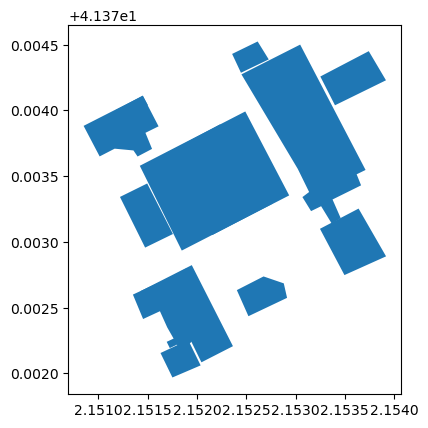

In [30]:
day_polygons.plot()

Getting the H3 cells that lay over the polygons and checking the result.

In [31]:
# Getting the H3 cells corresponding to the original polygons
day_polygons_h3=day_polygons.h3.polyfill_resample(13)
day_polygons_h3=day_polygons_h3.reset_index()
day_polygons_h3.rename(columns={'h3_polyfill':'h3_cell'}, inplace=True)

# Checking the resulting H3 cells shape structure (to check if there are duplicates)
print(f'There are {day_polygons_h3.shape[0]} H3 cells laying within the Sónar polygons')
print(f"There are {len(day_polygons_h3['h3_cell'].unique())} unique H3 cells")

day_polygons_h3

There are 685 H3 cells laying within the Sónar polygons
There are 623 unique H3 cells


,h3_cell,level_0,id,polygon_name,index,geometry,source_gis_file
0,8d394461ca7463f,0,88259806-b543-45e9-b0e9-87b0ac826ce6,SONAR DIA - SonarPark,0,"POLYGON ((2.15132 41.37390, 2.15133 41.37386, ...",p1
1,8d394461ca7423f,0,88259806-b543-45e9-b0e9-87b0ac826ce6,SONAR DIA - SonarPark,0,"POLYGON ((2.15146 41.37404, 2.15147 41.37400, ...",p1
2,8d394461ca747bf,0,88259806-b543-45e9-b0e9-87b0ac826ce6,SONAR DIA - SonarPark,0,"POLYGON ((2.15124 41.37389, 2.15125 41.37385, ...",p1
3,8d394461ca7457f,0,88259806-b543-45e9-b0e9-87b0ac826ce6,SONAR DIA - SonarPark,0,"POLYGON ((2.15114 41.37398, 2.15114 41.37395, ...",p1
4,8d394461ca7433f,0,88259806-b543-45e9-b0e9-87b0ac826ce6,SONAR DIA - SonarPark,0,"POLYGON ((2.15141 41.37408, 2.15142 41.37405, ...",p1
...,...,...,...,...,...,...,...
680,8d394461ca529bf,16,91dccca1-6ac3-462e-a1c7-3aaccd46cc7f,SONAR DIA - SonarComplex,0,"POLYGON ((2.15174 41.37234, 2.15174 41.37230, ...",p5.2
681,8d394461ca562bf,16,91dccca1-6ac3-462e-a1c7-3aaccd46cc7f,SONAR DIA - SonarComplex,0,"POLYGON ((2.15171 41.37245, 2.15172 41.37241, ...",p5.2
682,8d394461ca5633f,16,91dccca1-6ac3-462e-a1c7-3aaccd46cc7f,SONAR DIA - SonarComplex,0,"POLYGON ((2.15169 41.37256, 2.15170 41.37252, ...",p5.2
683,8d394461ca5637f,16,91dccca1-6ac3-462e-a1c7-3aaccd46cc7f,SONAR DIA - SonarComplex,0,"POLYGON ((2.15178 41.37257, 2.15178 41.37254, ...",p5.2


Fixing the polygons so that there are no overlaps and each H3 cell can be associated with a single polygon.

There are 124 non-unique cells


<Axes: >

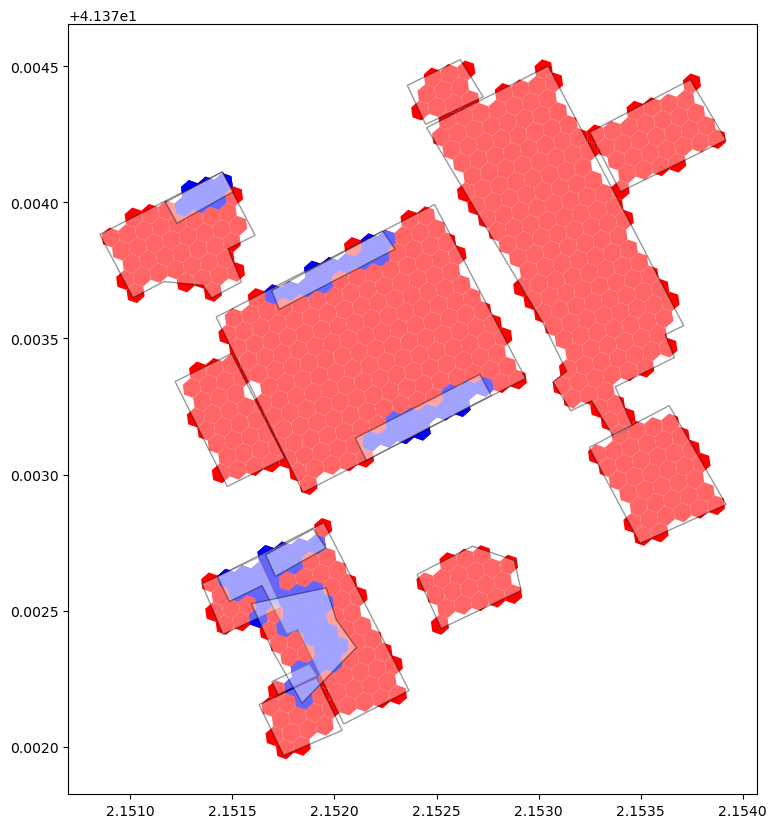

In [32]:
# Getting all duplicated values to see which cells are associated with more than one stage

non_unique_cells = day_polygons_h3.loc[day_polygons_h3['h3_cell'].duplicated(keep=False)]
print(f'There are {len(non_unique_cells)} non-unique cells')


fig, ax = plt.subplots(figsize=(10, 10))
day_polygons_h3.plot(ax=ax, color='red')
non_unique_cells.plot(ax=ax, color='blue')
day_polygons.plot(ax=ax, facecolor='white', edgecolor='black', alpha=0.4)

To avoid duplicates of the h3 cells, I clip the polygons, so that they do not overlap. In this case, there are different floors for one hall/building. For that reason, I will not clip those, they will be treated separately, and the trajectory files already have the information to determine what is the corresponding pair of cell-floor

<Axes: >

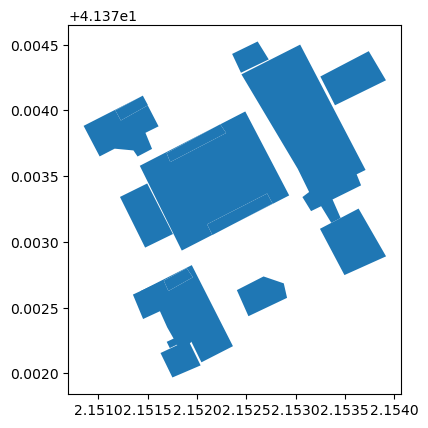

In [33]:
#Creating a dictionary to define, for each polygon (keys), which other polygon parts (values) will be removed
dict_clipping_day = {'SONAR DIA - SonarPark':['SONAR DIA - SonarPark Barra'],
                     'SONAR DIA - SonarVillage':['SONAR DIA - SonarVillage Barra 1','SONAR DIA - SonarVillage Barra 2'],
                     'SONAR DIA - Project Area':['SONAR DIA - Project Area Barra'],
                     'SONAR DIA - SonarHall Paso':['SONAR DIA - Food Trucks']}

day_polygons_clipped = day_polygons.copy()

for name_polygon, names_polygons_removal in dict_clipping_day.items():
    for name_polygon2 in names_polygons_removal:
        polygon = day_polygons_clipped.loc[day_polygons_clipped['polygon_name']==name_polygon]
        polygon2 = day_polygons_clipped.loc[day_polygons_clipped['polygon_name']==name_polygon2]

        # Removing the overlapping part
        polygon_geometry_clipped = polygon.geometry.difference(polygon2.geometry, align=False)

        # Updating the geometry in the original GeoDataFrame
        day_polygons_clipped.loc[day_polygons_clipped['polygon_name'] == name_polygon, 'geometry'] = polygon_geometry_clipped

day_polygons_clipped.plot()

Checking that there are no overlaps.

There are 650 H3 cells laying within the Sónar polygons
There are 54 non-unique cells (should correspond to the different floors of the same hall/building)


<Axes: >

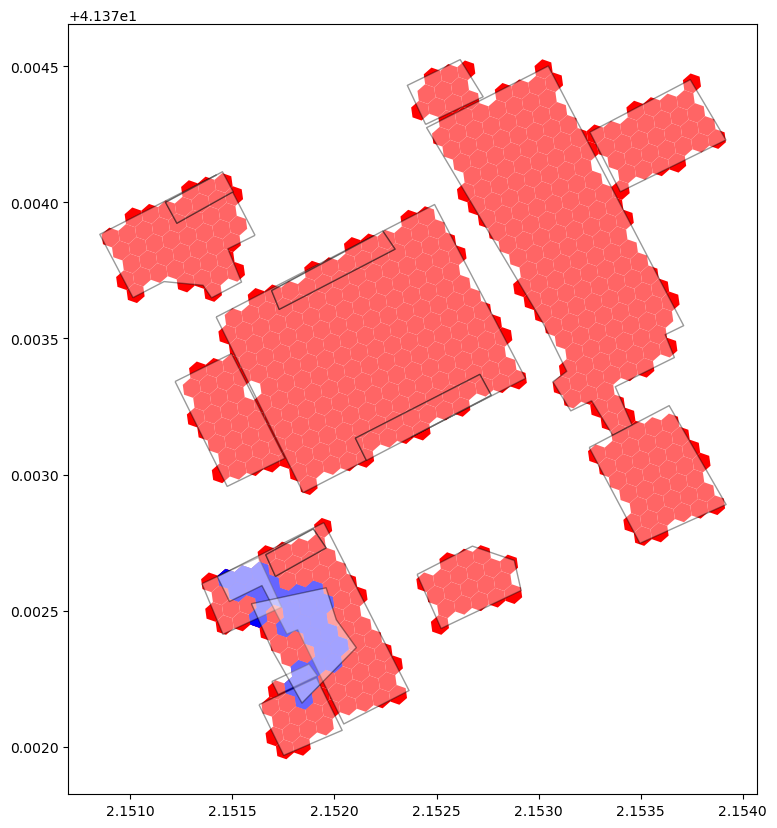

In [34]:
day_polygons_h3=day_polygons_clipped.h3.polyfill_resample(13)

day_polygons_h3=day_polygons_h3.reset_index()
day_polygons_h3.rename(columns={'h3_polyfill':'h3_cell'}, inplace=True)
print(f'There are {day_polygons_h3.shape[0]} H3 cells laying within the Sónar polygons')

non_unique_cells = day_polygons_h3.loc[day_polygons_h3['h3_cell'].duplicated(keep=False)]
print(f'There are {len(non_unique_cells)} non-unique cells (should correspond to the different floors of the same hall/building)')


fig, ax = plt.subplots(figsize=(10, 10))
day_polygons_h3.plot(ax=ax, color='red')
non_unique_cells.plot(ax=ax, color='blue')
day_polygons_clipped.plot(ax=ax, facecolor='white', edgecolor='black', alpha=0.4)

### Identifying cells from Sónar by Day

Getting a buffer to expand the area corresponding to the Sónar by Night.

<Axes: >

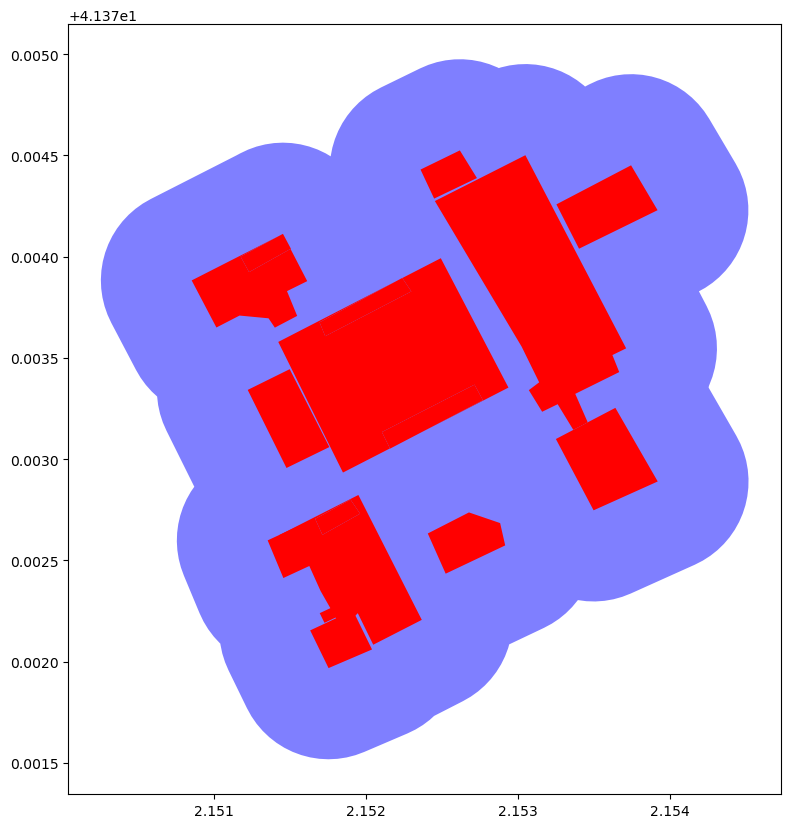

In [35]:
# Projecting the polygons and getting a buffer in meters
buffered_gdf_day = day_polygons_clipped.to_crs(day_polygons_clipped.estimate_utm_crs())
buffered_gdf_day['geometry'] = buffered_gdf_day.geometry.buffer(50)

# Dissolve all polygons into a single shape
dissolved_shape_day = buffered_gdf_day.dissolve()

# Reproject back to the original geographic CRS for plotting
dissolved_shape_day = dissolved_shape_day.to_crs(day_polygons_clipped.crs)

# Plotting the buffer below the polygons
fig, ax = plt.subplots(figsize=(10, 10))

dissolved_shape_day.plot(ax=ax, color='blue', alpha=0.5)
day_polygons_clipped.plot(ax=ax, color='red')

There are 2279 H3 cells laying within the Sónar buffer (Day)
There are 0 non-unique cells


<Axes: >

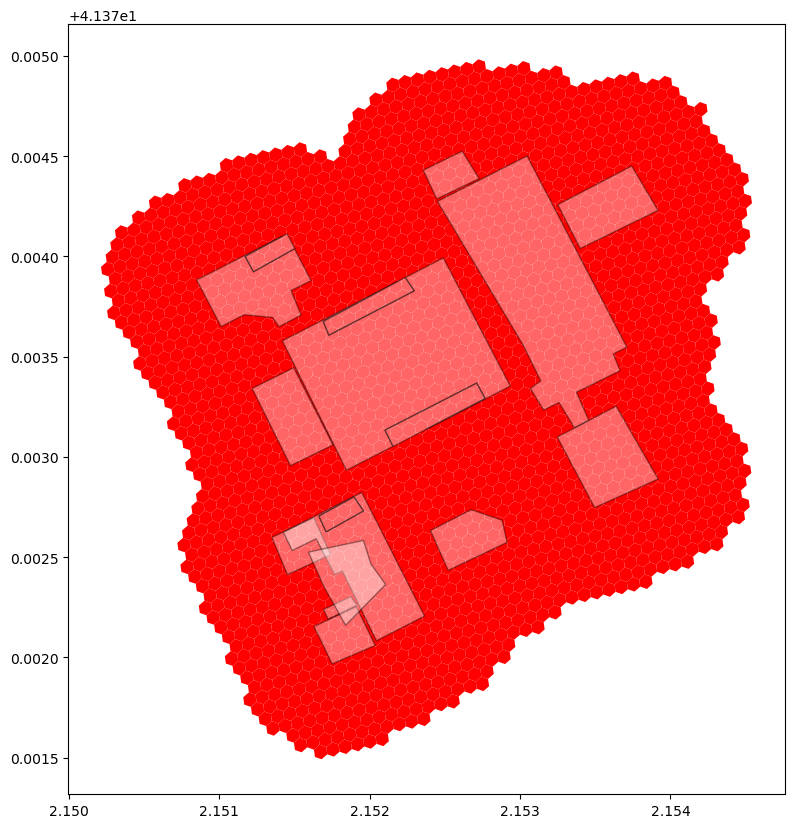

In [36]:
day_buffer_h3 = dissolved_shape_day.h3.polyfill_resample(13)

day_buffer_h3 = day_buffer_h3.reset_index()
day_buffer_h3.rename(columns={'h3_polyfill':'h3_cell'}, inplace=True)
print(f'There are {day_buffer_h3.shape[0]} H3 cells laying within the Sónar buffer (Day)')

non_unique_cells = day_buffer_h3.loc[day_buffer_h3['h3_cell'].duplicated(keep=False)]
print(f'There are {len(non_unique_cells)} non-unique cells')


fig, ax = plt.subplots(figsize=(10, 10))
day_buffer_h3.plot(ax=ax, color='red')
day_polygons_clipped.plot(ax=ax, facecolor='white', edgecolor='black', alpha=0.4)

In [37]:
# Extracting the cells and adding a label to identify them as belonging to Sónar by Night
day_buffer_h3 = day_buffer_h3[['h3_cell','geometry']].copy()
day_buffer_h3['sonar_type'] = 'sonar_day'
day_buffer_h3

,h3_cell,geometry,sonar_type
0,8d394461caeccff,"POLYGON ((2.15208 41.37184, 2.15209 41.37180, ...",sonar_day
1,8d394461ca2babf,"POLYGON ((2.15057 41.37361, 2.15058 41.37358, ...",sonar_day
2,8d394461ca446ff,"POLYGON ((2.15288 41.37370, 2.15288 41.37366, ...",sonar_day
3,8d394461ca4407f,"POLYGON ((2.15283 41.37392, 2.15284 41.37388, ...",sonar_day
4,8d394461ca5853f,"POLYGON ((2.15341 41.37238, 2.15342 41.37235, ...",sonar_day
...,...,...,...
2274,8d394461cb5a5bf,"POLYGON ((2.15067 41.37424, 2.15067 41.37421, ...",sonar_day
2275,8d394461cb5b6bf,"POLYGON ((2.15151 41.37427, 2.15151 41.37423, ...",sonar_day
2276,8d394461ca6a6bf,"POLYGON ((2.15394 41.37387, 2.15395 41.37383, ...",sonar_day
2277,8d394461ca684bf,"POLYGON ((2.15394 41.37432, 2.15395 41.37428, ...",sonar_day


Writing the resulting files for the buffer cells.

In [ ]:
# Writing the buffer shape to visualize it in context in Qgis
dissolved_shape_day.to_file(os.path.join(CLIPPED_POLYGONS_PATH,'buffer_day.json'), driver='GeoJSON')  

# Writing the H3 cells
day_buffer_h3.to_file(os.path.join(CLIPPED_POLYGONS_PATH,'h3_cells_day_lookup.json'), driver='GeoJSON')

### Associating the GIS polygons with their corresponding stages

The Sónar timetables contain the stages where each event ocurred, but there is not an explicit association to the corresponding polygons. I add them by manually looking at the polygons and the maps published by Sónar.

In [40]:
sonar_timetables['stage'].unique()

array(['SonarVillage', 'SonarHall', 'Complex+D', 'SonarPark', 'Stage+D',
       'SonarÀgora', 'Project Area', 'Room+D', 'Espai Oníric', 'Room+D 2',
       'SonarClub', 'SonarPub', 'SonarLab x Printworks', 'SonarCar'],
      dtype=object)

Adding the stage column as in the Sónar by night case.

In [41]:
day_polygon_to_stage = {'SONAR DIA - Cashless':'NA-cashless', # No stage, but explicit label added
                        'SONAR DIA - Food Trucks':'NA-food_trucks', # No stage, but explicit label added
                        'SONAR DIA - Lounge Barra':'NA-lounge_barra', # No stage, but explicit label added
                        'SONAR DIA - Lounge+D':'NA-lounge+d', # This is close to the area of 'Room+D' and 'Room+D 2', but there is no exact association in the polygons and there is no specification on the Sónar maps
                        'SONAR DIA - Project Area':'Project Area',
                        'SONAR DIA - Project Area Barra':'Project Area',
                        'SONAR DIA - SonarComplex':'Complex+D',
                        'SONAR DIA - SonarHall':'SonarHall',
                        'SONAR DIA - SonarHall Paso':'NA-sonar_hall_paso', # This is an area not directly associated with any stage, according to the Sónar layout. No stage, but explicit label added
                        'SONAR DIA - SonarPark':'SonarPark',
                        'SONAR DIA - SonarPark Barra':'SonarPark',
                        'SONAR DIA - SonarVillage':'SonarVillage',
                        'SONAR DIA - SonarVillage Barra 1':'SonarVillage',
                        'SONAR DIA - SonarVillage Barra 2':'SonarVillage',
                        'SONAR DIA - SonarVillage VIP':'SonarVillage',
                        'SONAR DIA - SonarÀgora':'SonarÀgora',
                        'SONAR DIA - Stage+D':'Stage+D'}

day_polygons_clipped['stage'] = day_polygons_clipped['polygon_name']
day_polygons_clipped['stage'] = day_polygons_clipped['stage'].replace(day_polygon_to_stage)
day_polygons_clipped

,id,polygon_name,index,geometry,source_gis_file,stage
0,88259806-b543-45e9-b0e9-87b0ac826ce6,SONAR DIA - SonarPark,0,"POLYGON ((2.15161 41.37388, 2.15148 41.37383, ...",p1,SonarPark
1,036a9d19-b2a9-45a9-aa74-0569fc82ba8c,SONAR DIA - SonarPark Barra,1,"POLYGON ((2.15117 41.37400, 2.15123 41.37392, ...",p1,SonarPark
2,aa598ed7-0b28-444d-8564-b434e0e34b82,SONAR DIA - SonarHall Paso,0,"POLYGON ((2.15326 41.37327, 2.15316 41.37323, ...",p2,NA-sonar_hall_paso
3,cfcf08c7-1230-4df9-9309-6ef436090d99,SONAR DIA - SonarHall,1,"POLYGON ((2.15325 41.37426, 2.15340 41.37404, ...",p2,SonarHall
4,97acc96a-1160-456d-abe7-4046ec78fc41,SONAR DIA - Food Trucks,2,"POLYGON ((2.15325 41.37310, 2.15350 41.37275, ...",p2,NA-food_trucks
5,a03c6c6f-b506-4915-bf7f-fc609b2e20e9,SONAR DIA - Stage+D,3,"POLYGON ((2.15245 41.37429, 2.15273 41.37439, ...",p2,Stage+D
6,f10d8100-ef6d-468b-acc4-09f8497cac7c,SONAR DIA - SonarVillage,0,"POLYGON ((2.15142 41.37358, 2.15219 41.37388, ...",p3,SonarVillage
7,0e9222e8-38be-49bf-bbdd-46a37ce4a899,SONAR DIA - SonarVillage VIP,1,"POLYGON ((2.15122 41.37334, 2.15147 41.37296, ...",p3,SonarVillage
8,dc79c74e-b7e6-4a8d-9b6d-f8d20138e8c9,SONAR DIA - SonarVillage Barra 2,2,"POLYGON ((2.15169 41.37368, 2.15173 41.37361, ...",p3,SonarVillage
9,fd73b9fb-8b96-473e-80ff-b648b8a18005,SONAR DIA - SonarVillage Barra 1,3,"POLYGON ((2.15216 41.37305, 2.15277 41.37329, ...",p3,SonarVillage


Notes: 
- According to the Sónar app, 'Espai Oníric' had a space at the Sónar Hall, but there doesn't seem to be direct association in the Sónar's layout (there are more things in the Sónar Hall than 'Espai Oníric', and it is a large space, so I leave it blank for now).

### Computing the area assigned to each stage

In [42]:
day_polygons_clipped = compute_stage_area(polygons_clipped=day_polygons_clipped)

### Writing the clipped polygons

In [43]:
day_polygons_clipped.to_file(os.path.join(CLIPPED_POLYGONS_PATH, 'sonar_day_polygons_clipped.json'), driver='GeoJSON')  

## Modifying the slug to polygons file

In [44]:
slug_to_polygon = pd.read_csv(os.path.join(input_path_zones,r'zones.csv'))
slug_to_polygon

,slug,name,parent__name
0,001I,SONAR DIA - SonarPark,SONAR 2024 - DIA
1,001X,SONAR DIA - SonarPark Barra,SONAR 2024 - DIA
2,001K,SONAR DIA - SonarHall Paso,SONAR 2024 - DIA
3,001L,SONAR DIA - SonarHall,SONAR 2024 - DIA
4,001M,SONAR DIA - Food Trucks,SONAR 2024 - DIA
5,001N,SONAR DIA - Stage+D,SONAR 2024 - DIA
6,001F,SONAR DIA - SonarVillage,SONAR 2024 - DIA
7,001G,SONAR DIA - SonarVillage VIP,SONAR 2024 - DIA
8,001V,SONAR DIA - SonarVillage Barra 2,SONAR 2024 - DIA
9,001W,SONAR DIA - SonarVillage Barra 1,SONAR 2024 - DIA


In [45]:
slug_to_polygon.rename(columns={'name':'polygon_name'}, inplace=True)

Changing the name of some values that were also changed in my modifed polygons file (it had confusing names)

In [46]:
slug_to_polygon['polygon_name'] = slug_to_polygon['polygon_name'].replace({'SONAR NIT - SonarCar Barra Car':'SONAR NIT - Autos de choques Barra',
                                                                           'SONAR NIT - SonarCar Barra Car 2':'SONAR NIT - SonarCar Barra'})
slug_to_polygon

,slug,polygon_name,parent__name
0,001I,SONAR DIA - SonarPark,SONAR 2024 - DIA
1,001X,SONAR DIA - SonarPark Barra,SONAR 2024 - DIA
2,001K,SONAR DIA - SonarHall Paso,SONAR 2024 - DIA
3,001L,SONAR DIA - SonarHall,SONAR 2024 - DIA
4,001M,SONAR DIA - Food Trucks,SONAR 2024 - DIA
5,001N,SONAR DIA - Stage+D,SONAR 2024 - DIA
6,001F,SONAR DIA - SonarVillage,SONAR 2024 - DIA
7,001G,SONAR DIA - SonarVillage VIP,SONAR 2024 - DIA
8,001V,SONAR DIA - SonarVillage Barra 2,SONAR 2024 - DIA
9,001W,SONAR DIA - SonarVillage Barra 1,SONAR 2024 - DIA


Joining the stage column to facilitate fast queries.

In [47]:
all_stages_concat = pd.concat([night_polygons_clipped[['polygon_name','stage']],
                               day_polygons_clipped[['polygon_name','stage']]])

In [48]:
slug_to_polygon = pd.merge(slug_to_polygon, all_stages_concat, 
                           on='polygon_name', how='left')
slug_to_polygon

,slug,polygon_name,parent__name,stage
0,001I,SONAR DIA - SonarPark,SONAR 2024 - DIA,SonarPark
1,001X,SONAR DIA - SonarPark Barra,SONAR 2024 - DIA,SonarPark
2,001K,SONAR DIA - SonarHall Paso,SONAR 2024 - DIA,NA-sonar_hall_paso
3,001L,SONAR DIA - SonarHall,SONAR 2024 - DIA,SonarHall
4,001M,SONAR DIA - Food Trucks,SONAR 2024 - DIA,NA-food_trucks
5,001N,SONAR DIA - Stage+D,SONAR 2024 - DIA,Stage+D
6,001F,SONAR DIA - SonarVillage,SONAR 2024 - DIA,SonarVillage
7,001G,SONAR DIA - SonarVillage VIP,SONAR 2024 - DIA,SonarVillage
8,001V,SONAR DIA - SonarVillage Barra 2,SONAR 2024 - DIA,SonarVillage
9,001W,SONAR DIA - SonarVillage Barra 1,SONAR 2024 - DIA,SonarVillage


Writing the modified slug_to_file.

In [ ]:
slug_to_polygon.to_csv(os.path.join(CLIPPED_POLYGONS_PATH, 'slug_to_polygon_processed.csv'), index=False)